# Sistema de lógica difusa para encontrar centrocampistas jovenes con un buen potencial

Este ejemplo muestra cómo crear un sistema experto con lógica difusa para detectar centro-campistas jóvenes con buen potencial.Nos basaremos en el trabajo de Luka Radovanović, un estudiante de la Universidad de Belgrado. El resultado del trabajo se puede encontrar en: https://github.com/lukadlm97/football-manager-resching/tree/master

## Planteamiento del problema

Uno de los problemas que encuentran los equipos de fútbol es la detección de jugadores jóvenes con potencial. Es por eso que estamos creando un sistema expertos con lógica difusa que nos ayude a detectar centrocampistas ofensivos jóvenes con potencial.

Hemos elegido la posición de un centrocampista ofensivo porque es una posición de lo más difícil de encontrar y, por lo tanto, es una posición que los equipos están buscando mucho.Además, es una posición en la que muchos de los mejores jugadores de la historia han jugado, como: Di Stefano, Maradona, Zidane, Platini, etc.

## Pasos previos

Necesitamos instalar la libreria scikit-fuzzy, pero no podemos usar la última versión (0.5), con la 0.4.2 es suficiente.

In [ ]:
%pip install scikit-fuzzy==0.4.2 #La libreria 0.5 es más reciente pero tiene problemas con el ControlSystem.view()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894076 sha256=2de18b80fff5c6a205b2920291e27edd3b7892cb6634f7d4b63a98be6d286caf
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


## Anàlisi de les dades

Primero cargamos los datos (`EX2.-players_22.csv`) y vemos cómo están estructurados.
Cargaremos los datos en un DataFrame de datos de Pandas y observaremos las primeras filas.

In [ ]:
import pandas as pd

df = pd.read_csv('EX2.-players_22.csv')
df

<ipython-input-2-c51e318d3d01>:3: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('EX2.-players_22.csv')


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


También será útil para nosotros que nos describan los datos para conocer su distribución.

In [ ]:
df.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


Como hemos dicho, estamos buscando un centro-campista ofensivo joven, por lo que eliminaremos a todos los jugadores que no juegan en esta posición (CAM - Center Attacking Midfielders) o tienen más de 24 años.

In [ ]:
df = df[(df['player_positions'].str.contains('CAM')) & (df['age'] <= 24)]
df

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
138,235790,https://sofifa.com/player/235790/kai-havertz/2...,K. Havertz,Kai Lukas Havertz,"CAM, CF, CM",84,92,94500000.0,130000.0,22,...,55+3,55+3,55+3,62+3,17+3,https://cdn.sofifa.net/players/235/790/22_120.png,https://cdn.sofifa.net/teams/5/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png
139,237692,https://sofifa.com/player/237692/phil-foden/22...,P. Foden,Philip Foden,"CAM, LW, CM",84,92,94500000.0,125000.0,21,...,59+3,59+3,59+3,68+3,19+3,https://cdn.sofifa.net/players/237/692/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png
193,233064,https://sofifa.com/player/233064/mason-mount/2...,M. Mount,Mason Mount,"CAM, CM, RW",83,89,58500000.0,120000.0,22,...,60+3,60+3,60+3,68+3,19+3,https://cdn.sofifa.net/players/233/064/22_120.png,https://cdn.sofifa.net/teams/5/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png
252,220697,https://sofifa.com/player/220697/james-maddiso...,J. Maddison,James Maddison,"CAM, CM",82,85,41500000.0,100000.0,24,...,57+2,57+2,57+2,65+2,20+2,https://cdn.sofifa.net/players/220/697/22_120.png,https://cdn.sofifa.net/teams/95/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png
254,222665,https://sofifa.com/player/222665/martin-odegaa...,M. Ødegaard,Martin Ødegaard,"CAM, CM",82,88,49000000.0,89000.0,22,...,60+3,60+3,60+3,68+3,19+3,https://cdn.sofifa.net/players/222/665/22_120.png,https://cdn.sofifa.net/teams/1/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1352/60.png,https://cdn.sofifa.net/flags/no.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19169,264072,https://sofifa.com/player/264072/bernardo-oliv...,Bernardo,Bernardo Oliveira,CAM,49,67,120000.0,500.0,17,...,39+2,39+2,39+2,42+2,14+2,https://cdn.sofifa.net/players/264/072/22_120.png,https://cdn.sofifa.net/teams/111393/60.png,https://cdn.sofifa.net/flags/au.png,NaN,https://cdn.sofifa.net/flags/br.png
19171,264142,https://sofifa.com/player/264142/aaron-doran/2...,A. Doran,Aaron Doran,CAM,49,62,110000.0,500.0,18,...,42+2,42+2,42+2,44+2,14+2,https://cdn.sofifa.net/players/264/142/22_120.png,https://cdn.sofifa.net/teams/305/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19194,259649,https://sofifa.com/player/259649/engson-singh/...,E. Singh,Engson Singh,"CAM, CM",48,65,120000.0,500.0,18,...,37+2,37+2,37+2,41+2,12+2,https://cdn.sofifa.net/players/259/649/22_120.png,https://cdn.sofifa.net/teams/113146/60.png,https://cdn.sofifa.net/flags/in.png,NaN,https://cdn.sofifa.net/flags/in.png
19233,261818,https://sofifa.com/player/261818/ronan-gallagh...,R. Gallagher,Ronan Gallagher,CAM,47,61,110000.0,500.0,20,...,39+2,39+2,39+2,41+2,15+2,https://cdn.sofifa.net/players/261/818/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


## Análisis del potencial

Para hacer una primera aproximación al potencial de los jugadores, hemos hecho una primera hipótesis que nos dice que los jugadores más potenciales son aquellos que son muy jóvenes y tienen una gran habilidad para pasar la pelota.

Luego crearemos un sistema difuso con dos variables de entrada: la edad y la capacidad de pasar la pelota. La variable de salida será el potencial.

El resumen de las reglas propuestas es el siguiente:

### Relación entre la edad y la categoría lingüística

| Edad  | Categoría    |
|-------|--------------|
| 16-18 | Joven        |
| 17-21 | Junior       |
| 20-24 | Senior-joven |

### Relación entre la capacidad de pasar la pelota y la categoría lingüística

| Pasar la pelota | Categoría   |
|-----------------|-------------|
| <=60            | Baja        |
| 60-85           | Promedia    |
| >=80-100        | Alta        |

### Relación entre la categoría lingüística de potencial y su valor numérico

Las variables de salida serán triangulares.

| Potencial | Valor numérico |
|-----------|----------------|
| Bajo      | <40            |
| Promedio  | 10 - 90        |
| Alto      | 60 - 100       |

Define los antecedentes y la consecuencia con sus funciones de adhesión.

In [ ]:
# define aquí los antecedentes y el consecuente y a continuación cada una de las funciones de pertenencia (edad, calidad_pasada, potencial)

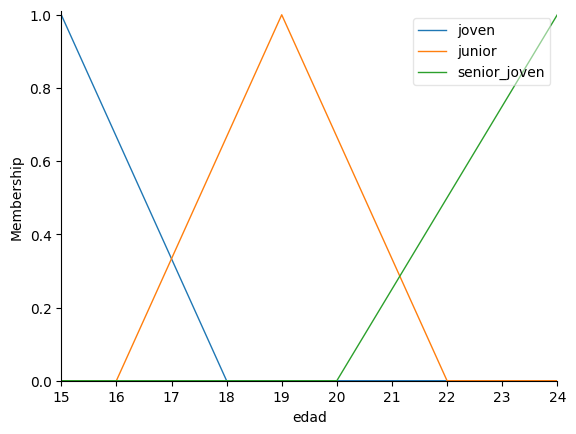

In [ ]:
# define la función de pertenencia para edad y visualizala

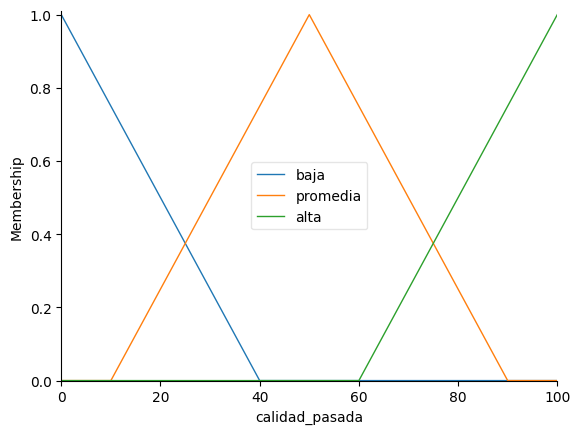

In [ ]:
# define la función de pertenencia para calidad_pasada y visualizala

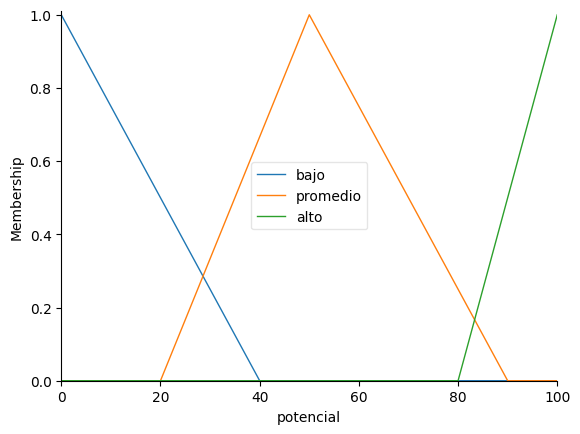

In [ ]:
# define la función de pertenencia para potencial y visualizala

## Reglas

Debemos definir las reglas que relacionan las variables de entrada con la variable de salida. Será lo siguiente:

| Edad         | Calidad pasada | Potencial |
|--------------|----------------|-----------|
| Joven        | Alta           | Alto      |
| Joven        | Promedia       | Promedio  |
| Joven        | Baixa          | Promedio  |
| Junior       | Alta           | Alto      |
| Junior       | Promedia       | Promedio  |
| Junior       | Baixa          | Bajo      |
| Senior-joven | Alta           | Alto      |
| Senior-joven | Promedia       | Bajo      |
| Senior-joven | Baixa          | Bajo      |

Cree las reglas para nuestro sistema y el sistema de control. Ver las dependencias.

In [ ]:
# Define aquí las reglas


In [ ]:
# Añadelas al sistema de control

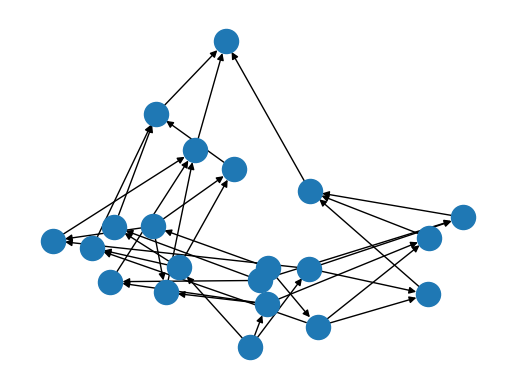

In [ ]:
# Visualizalas

Antes de aplicar nuestro modelo a todos los datos que tenemos, debemos probarlo con un par de ejemplos.
¿Cuál será el potencial de un jugador de 17 años y un pase de 40? ¿Y si tuviera un pase de 80? También evalúa los dos casos anteriores si tenía 23 años.

In [ ]:
# Realiza la simulación

In [ ]:
# Carga los datos para el primer caso de prueba

54.222222222222186


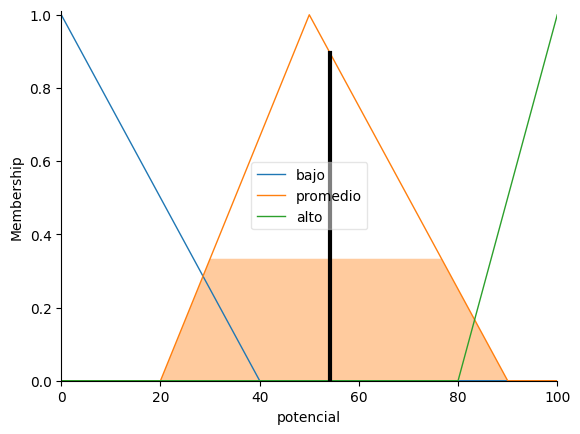

In [ ]:
# Computa y visualiza la solución para la primera prueba

In [ ]:
# Carga los datos para el segundo caso de prueba

63.465367765381686


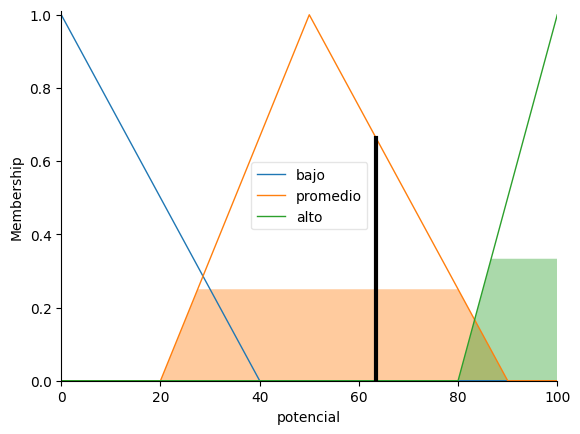

In [ ]:
# Computa y visualiza la solución para la segunda prueba

In [ ]:
# Carga los datos para el primer caso de prueba pero con 23 años

14.0


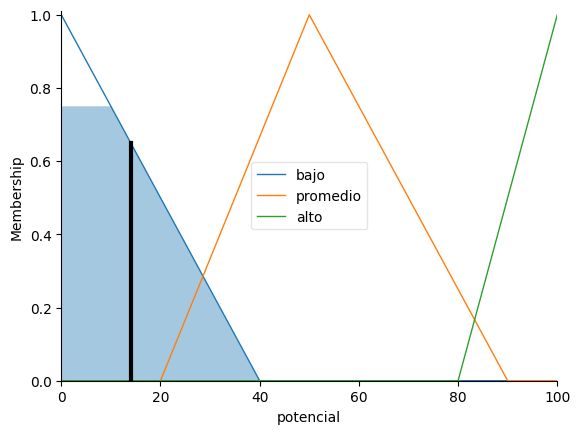

In [ ]:
# Computa y visualiza la solución para la primera prueba pero con 23 años

In [ ]:
# Carga los datos para el segundo caso de prueba pero con 23 años

52.051282051282044


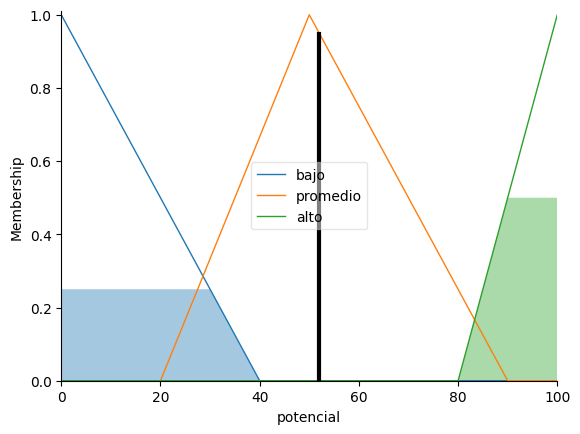

In [ ]:
# Computa y visualiza la solución para la segunda prueba pero con 23 años

## Actualitzar el DataFrame

Actualiza el DataFrame con los datos calculados por nuestro modelo. Crea una columna llamada "potencial" con los datos que hemos calculado.

In [ ]:
# Crea la columna potencial con los datos que hemos calculado

<ipython-input-22-3fe053d09759>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['potencial'] = df.apply(potencial_jugador, axis=1)


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,potencial
138,235790,https://sofifa.com/player/235790/kai-havertz/2...,K. Havertz,Kai Lukas Havertz,"CAM, CF, CM",84,92,94500000.0,130000.0,22,...,55+3,55+3,62+3,17+3,https://cdn.sofifa.net/players/235/790/22_120.png,https://cdn.sofifa.net/teams/5/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png,49.751276
139,237692,https://sofifa.com/player/237692/phil-foden/22...,P. Foden,Philip Foden,"CAM, LW, CM",84,92,94500000.0,125000.0,21,...,59+3,59+3,68+3,19+3,https://cdn.sofifa.net/players/237/692/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png,51.697649
193,233064,https://sofifa.com/player/233064/mason-mount/2...,M. Mount,Mason Mount,"CAM, CM, RW",83,89,58500000.0,120000.0,22,...,60+3,60+3,68+3,19+3,https://cdn.sofifa.net/players/233/064/22_120.png,https://cdn.sofifa.net/teams/5/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png,60.886335
252,220697,https://sofifa.com/player/220697/james-maddiso...,J. Maddison,James Maddison,"CAM, CM",82,85,41500000.0,100000.0,24,...,57+2,57+2,65+2,20+2,https://cdn.sofifa.net/players/220/697/22_120.png,https://cdn.sofifa.net/teams/95/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png,63.118280
254,222665,https://sofifa.com/player/222665/martin-odegaa...,M. Ødegaard,Martin Ødegaard,"CAM, CM",82,88,49000000.0,89000.0,22,...,60+3,60+3,68+3,19+3,https://cdn.sofifa.net/players/222/665/22_120.png,https://cdn.sofifa.net/teams/1/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1352/60.png,https://cdn.sofifa.net/flags/no.png,58.224722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19169,264072,https://sofifa.com/player/264072/bernardo-oliv...,Bernardo,Bernardo Oliveira,CAM,49,67,120000.0,500.0,17,...,39+2,39+2,42+2,14+2,https://cdn.sofifa.net/players/264/072/22_120.png,https://cdn.sofifa.net/teams/111393/60.png,https://cdn.sofifa.net/flags/au.png,NaN,https://cdn.sofifa.net/flags/br.png,54.222222
19171,264142,https://sofifa.com/player/264142/aaron-doran/2...,A. Doran,Aaron Doran,CAM,49,62,110000.0,500.0,18,...,42+2,42+2,44+2,14+2,https://cdn.sofifa.net/players/264/142/22_120.png,https://cdn.sofifa.net/teams/305/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png,53.611111
19194,259649,https://sofifa.com/player/259649/engson-singh/...,E. Singh,Engson Singh,"CAM, CM",48,65,120000.0,500.0,18,...,37+2,37+2,41+2,12+2,https://cdn.sofifa.net/players/259/649/22_120.png,https://cdn.sofifa.net/teams/113146/60.png,https://cdn.sofifa.net/flags/in.png,NaN,https://cdn.sofifa.net/flags/in.png,53.611111
19233,261818,https://sofifa.com/player/261818/ronan-gallagh...,R. Gallagher,Ronan Gallagher,CAM,47,61,110000.0,500.0,20,...,39+2,39+2,41+2,15+2,https://cdn.sofifa.net/players/261/818/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png,53.611111


## Conclusiones

Si observamos los resultados, podemos concluir que nuestro modelo es bastante consistente, incluso si los números no son del todo realistas.
¿Cómo podemos mejorar el modelo? Agrega cierta mejora o basate en el trabajo de Luka Radovanović y comenta los resultados.

In [ ]:
# Agrega las celdas de código que necesites

Agrega también las celdas de markdown que necesites para explicarlo

# Entrega

Una vez completado el Notebook y ejecutado completamente (comprueba que funcionan todas las celdas) y añadidas las mejoras. Envialo a la tarea correspondiente de AULES.